<a href="https://colab.research.google.com/github/dharmikyash7118/PytorchModel/blob/main/TabularDataClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opendatasets --quiet
import opendatasets as od
od.download("https://www.kaggle.com/datasets/mssmartypants/rice-type-classification")


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: dharmikyash7118
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/mssmartypants/rice-type-classification


100%|██████████| 888k/888k [00:00<00:00, 690MB/s]

In [ ]:
import torch
import torch.nn as nn
from torch.optim import Adam
from torch.utils.data import Dataset,DataLoader
from torchsummary import summary
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
device="cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
data_df=pd.read_csv("/content/rice-type-classification/riceClassification.csv")
data_df.dropna(inplace=True)
data_df.drop(["id"], axis=1,inplace=True)
print("Output possibilities:", data_df["Class"].unique())
print("Data Shape(rows,columns):",data_df.shape)
data_df.head()

Output possibilities: [1 0]
Data Shape(rows,columns): (18185, 11)


,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1


In [ ]:
original_df=data_df.copy()
for column in data_df.columns:
  data_df[column]=data_df[column]/data_df[column].abs().max()
data_df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,0.444368,0.503404,0.775435,0.744658,0.424873,0.666610,0.741661,0.537029,0.844997,0.368316,1.0
1,0.281293,0.407681,0.622653,0.750489,0.273892,0.530370,0.804230,0.409661,0.919215,0.371471,1.0
2,0.298531,0.416421,0.630442,0.756341,0.284520,0.546380,0.856278,0.412994,0.959862,0.374747,1.0
3,0.300979,0.420463,0.629049,0.764024,0.286791,0.548616,0.883772,0.414262,0.961818,0.379222,1.0
4,0.361704,0.464626,0.682901,0.775033,0.345385,0.601418,0.867808,0.452954,0.966836,0.386007,1.0


In [ ]:
X=np.array(data_df.iloc[:,:-1])
Y=np.array(data_df.iloc[:,-1])
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3)
X_test,X_val,y_test,y_val=train_test_split(X_test,y_test,test_size=0.5)
print("Training set is:",X_train.shape[0],"rows which is ",round(X_train.shape[0]/data_df.shape[0],4)*100,"%")
print("Validation set is:",X_val.shape[0],"rows which is ",round(X_val.shape[0]/data_df.shape[0],4)*100,"%")
print("Testing set is:",X_test.shape[0],"rows which is ",round(X_test.shape[0]/data_df.shape[0],4)*100,"%")

Training set is: 12729 rows which is  70.0 %
Validation set is: 2728 rows which is  15.0 %
Testing set is: 2728 rows which is  15.0 %


In [ ]:
class dataset(Dataset):
  def __init__(self,X,Y):
    self.X=torch.tensor(X,dtype=torch.float32).to(device)
    self.Y=torch.tensor(Y,dtype=torch.float32).to(device)
  def __len__(self):
    return len(self.X)
  def __getitem__(self, index):
    return self.X[index],self.Y[index]
training_data=dataset(X_train,y_train)
validation_data=dataset(X_val,y_val)
testing_data=dataset(X_test,y_test)

In [ ]:
BATCH_SIZE=32
EPOCHS=10
HIDDEN_NEURONS=10
LR=0.001
train_dataloader=DataLoader(training_data,batch_size=BATCH_SIZE,shuffle=True)
val_dataloader=DataLoader(validation_data,batch_size=BATCH_SIZE,shuffle=True)
test_dataloader=DataLoader(testing_data,batch_size=BATCH_SIZE,shuffle=True)

In [ ]:
class MyModel(nn.Module):
  def __init__(self):
    super(MyModel,self).__init__()
    self.input_layer=nn.Linear(X.shape[1],HIDDEN_NEURONS)
    self.linear=nn.Linear(HIDDEN_NEURONS,1)
    self.sigmoid=nn.Sigmoid()

  def forward(self,x):
    x=self.input_layer(x)
    x=self.linear(x)
    x=self.sigmoid(x)
    return x

In [ ]:
model=MyModel().to(device)
summary(model,(X.shape[1],))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 10]             110
            Linear-2                    [-1, 1]              11
           Sigmoid-3                    [-1, 1]               0
Total params: 121
Trainable params: 121
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


In [ ]:
criterion=nn.BCELoss()
optimizer=Adam(model.parameters(),lr=LR)

In [ ]:
total_loss_train_plot=[]
total_loss_validation_plot=[]
total_acc_train_plot=[]
total_acc_validation_plot=[]

for epoch in range(EPOCHS):
  total_acc_train=0
  total_loss_train=0
  total_acc_val=0
  total_loss_val=0
  for data in train_dataloader:
    inputs,labels=data
    prediction=model(inputs).squeeze(1)
    batch_loss=criterion(prediction,labels)
    total_loss_train+=batch_loss.item()
    acc=((prediction).round()==labels).sum().item()
    total_acc_train+=acc
    batch_loss.backward()
    optimizer.step()
    optimizer.zero_grad()
  with torch.no_grad():
    for data in val_dataloader:
      inputs,labels=data
      prediction=model(inputs).squeeze(1)
      batch_loss=criterion(prediction,labels)
      total_loss_val+=batch_loss.item()
      acc=((prediction).round()==labels).sum().item()
      total_acc_val+=acc
  total_loss_train_plot.append(round(total_loss_train/1000,4))
  total_loss_validation_plot.append(round(total_loss_val/1000,4))
  total_acc_train_plot.append(round(total_acc_train/(training_data.__len__())*100,4))
  total_acc_validation_plot.append(round(total_acc_val/(validation_data.__len__())*100,4))

  print(f"Epoch no. {epoch+1} Train Loss:{total_loss_train/1000:.4f} Train Accuracy:{(total_acc_train/(training_data.__len__())*100):.4f} Validation Loss:{total_loss_val/1000:.4f} Validation Accuracy:{(total_acc_val/(validation_data.__len__())*100):.4f}  Validation Accuracy: {(total_acc_val/(validation_data.__len__())*100):.4f}")
  print("-"*50)

Epoch no. 1 Train Loss:0.2480 Train Accuracy:74.3578 Validation Loss:0.0427 Validation Accuracy:96.7742  Validation Accuracy: 96.7742
--------------------------------------------------
Epoch no. 2 Train Loss:0.1328 Train Accuracy:98.1067 Validation Loss:0.0179 Validation Accuracy:97.8739  Validation Accuracy: 97.8739
--------------------------------------------------
Epoch no. 3 Train Loss:0.0599 Train Accuracy:98.3424 Validation Loss:0.0095 Validation Accuracy:98.3871  Validation Accuracy: 98.3871
--------------------------------------------------
Epoch no. 4 Train Loss:0.0371 Train Accuracy:98.4366 Validation Loss:0.0068 Validation Accuracy:98.6070  Validation Accuracy: 98.6070
--------------------------------------------------
Epoch no. 5 Train Loss:0.0282 Train Accuracy:98.5545 Validation Loss:0.0055 Validation Accuracy:98.4604  Validation Accuracy: 98.4604
--------------------------------------------------
Epoch no. 6 Train Loss:0.0237 Train Accuracy:98.6016 Validation Loss:0.0048

In [ ]:
with torch.no_grad():
  total_loss_test=0
  total_acc_test=0
  for data in test_dataloader:
    inputs,labels=data
    prediction=model(inputs).squeeze(1)
    batch_loss_test=criterion((prediction),labels)
    total_loss_test+=batch_loss_test.item()
    acc=((prediction).round()==labels).sum().item()
    total_acc_test+=acc

print(f"Accuracy Score is : {round((total_acc_test/X_test.shape[0])*100,2)}%"  )

Accuracy Score is : 98.57%


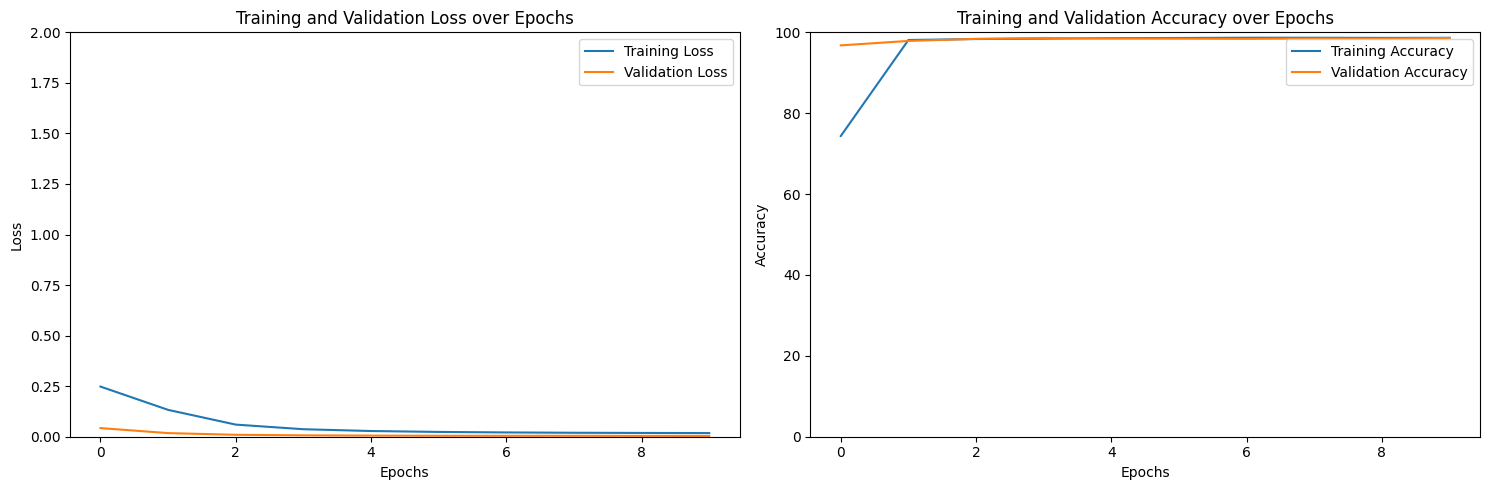

In [ ]:
fig,axs=plt.subplots(nrows=1,ncols=2,figsize=(15,5))

axs[0].plot(total_loss_train_plot,label="Training Loss")
axs[0].plot(total_loss_validation_plot,label="Validation Loss")
axs[0].set_title("Training and Validation Loss over Epochs")
axs[0].set_xlabel("Epochs")
axs[0].set_ylabel("Loss")
axs[0].set_ylim([0,2])
axs[0].legend()

axs[1].plot(total_acc_train_plot,label="Training Accuracy")
axs[1].plot(total_acc_validation_plot,label='Validation Accuracy')
axs[1].set_title('Training and Validation Accuracy over Epochs')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].set_ylim([0,100])
axs[1].legend()
plt.tight_layout()
plt.show()

In [ ]:
area=float(input("Area: "))/original_df['Area'].abs().max()
MajorAxisLength=float(input("Major Axis Length: "))/original_df['MajorAxisLength'].abs().max()
MinorAxisLength=float(input("Minor Axis Length: "))/original_df['MinorAxisLength'].abs().max()
Eccentricity=float(input("Eccentricity: "))/original_df["Eccentricity"].abs().max()
ConvexArea=float(input("Convex Area: "))/original_df["ConvexArea"].abs().max()
EquivDiameter=float(input("Equiv Diameter: "))/original_df["EquivDiameter"].abs().max()
Extend=float(input("Extent: "))/original_df["Extent"].abs().max()
Perimeter=float(input("Perimeter: "))/original_df["Perimeter"].abs().max()
Roundness=float(input("Roundness: "))/original_df["Roundness"].abs().max()
AspectRation=float(input("AspectRation: "))/original_df["AspectRation"].abs().max()

my_inputs=[area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extend,Perimeter,Roundness,AspectRation]
print("- "*30)
model_inputs=torch.Tensor(my_inputs).to(device)
prediction=(model(model_inputs))
print(prediction)
print("Class is: ", round(prediction.item()))


Area: 6431.279
Major Axis Length: 145.21338
Minor Axis Length: 56.902
Eccentricity: 0.919981921
Convex Area: 6518.93759999
Equiv Diameter: 90.483541
Extent: 0.8506668
Perimeter: 329.972
Roundness: 0.742255516
AspectRation: 2.551696
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
tensor([0.8022], device='cuda:0', grad_fn=<SigmoidBackward0>)
Class is:  1
